In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

In [2]:
gene_exp_df = pd.read_table('data/trunc_combined_rna_data.tsv', header=0, index_col=0)
data_logged = gene_exp_df.copy()
data_logged = np.log(data_logged)
data_logged.replace([np.inf, -np.inf], np.nan, inplace=True)

### Replace all NaNs with lowest possible values in matrix
a = list(data_logged.min())
lowest_possible_exp_value = math.floor(min(a))
# We want to replace all NaNs with a very small value.
# to ensure that an NaN represents the floor of the range.
data_logged.replace(np.nan, lowest_possible_exp_value, inplace=True)
len(data_logged.columns.values)

622

In [3]:
stage_info=pd.read_table('data/clinical/COADREAD.clin.merged.txt',index_col=0,skiprows=16)
stage_info=stage_info.loc["patient.stage_event.pathologic_stage"]
stage_info.head()

tcga-a6-2677    stage iiic
tcga-a6-2681     stage iia
tcga-a6-2682      stage iv
tcga-a6-4105     stage iia
tcga-a6-6649    stage iiib
Name: patient.stage_event.pathologic_stage, dtype: object

In [4]:
cell_type_info=pd.read_table('data/clinical/COADREAD.clin.merged.txt',index_col=0,skiprows=16)
cell_type_info=cell_type_info.loc["patient.tumor_tissue_site"]
cell_type_info.head()

tcga-a6-2677    colon
tcga-a6-2681    colon
tcga-a6-2682    colon
tcga-a6-4105    colon
tcga-a6-6649    colon
Name: patient.tumor_tissue_site, dtype: object

In [5]:
cell_type_info=pd.read_table('data/clinical/COADREAD.clin.merged.txt',index_col=0,skiprows=16)
cell_type_info=cell_type_info.loc["patient.tumor_tissue_site"]

retcum_patient_list = []
colon_patient_list = []
for idx in range(len(cell_type_info)):
    if cell_type_info[idx] == 'rectum':
        retcum_patient_list.append(str(cell_type_info.index[idx].upper()))
    elif cell_type_info[idx] == 'colon':
        colon_patient_list.append(str(cell_type_info.index[idx].upper()))

In [6]:
stage_count = {}
for stage in stage_info:
    if stage in stage_count.keys():
        stage_count[stage] += 1
    else:
        stage_count[stage] = 0
pprint(stage_count)

{nan: 19,
 'stage i': 107,
 'stage ia': 0,
 'stage ii': 37,
 'stage iia': 176,
 'stage iib': 11,
 'stage iic': 1,
 'stage iii': 24,
 'stage iiia': 14,
 'stage iiib': 85,
 'stage iiic': 54,
 'stage iv': 63,
 'stage iva': 23,
 'stage ivb': 1}


In [7]:
def get_stage_df(stage_to_keep, total_df):
    stage_df = total_df.copy()
    patient_to_remove = []
    for patient, stage in stage_info.items():
        patient = patient.upper()
        if patient in stage_df.keys():
            if stage != stage_to_keep:
                patient_to_remove.append(patient)
                
    stage_df.drop(patient_to_remove, inplace=True, axis=1)
    return stage_df

In [8]:
def plot_pca_components(data_df, reduced_data, x_axis_pc, y_axis_pc, patient_color_list, title):
    plt.figure(figsize=(10,10))
    for i, name in enumerate(data_df.columns.tolist()):
        plt.scatter(reduced_data[i,x_axis_pc], reduced_data[i,y_axis_pc], c=patient_color_list[i])
    plt.axvline()
    plt.axhline()
    plt.xlabel('PC'+str(x_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[x_axis_pc])
    plt.ylabel('PC'+str(y_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[y_axis_pc])
    plt.title(title)

In [9]:
def get_patient_color_list(patient_gene_exp_df, tissue):
    patient_color_list = []
    for patient in patient_gene_exp_df.columns:
        patient_tissue = cell_type_info[patient.lower()]
        if str(patient_tissue) == 'nan':
            patient_color_list.append('grey')
        elif patient_tissue == tissue:
            patient_color_list.append('red')
        else:
            patient_color_list.append('blue')
    return patient_color_list

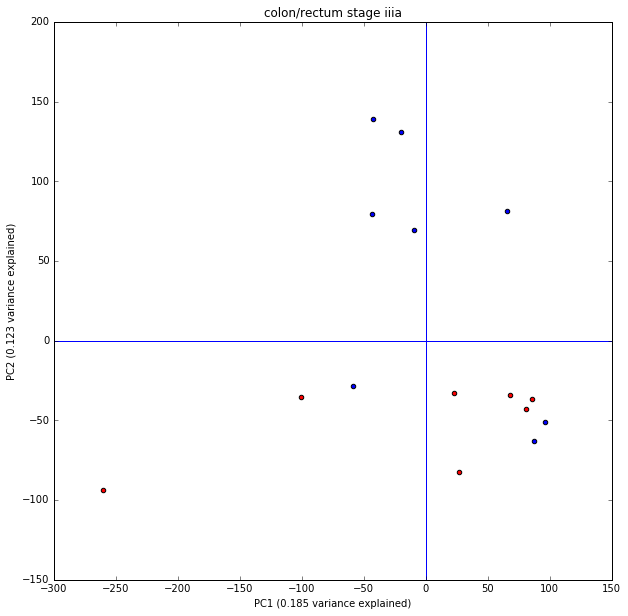

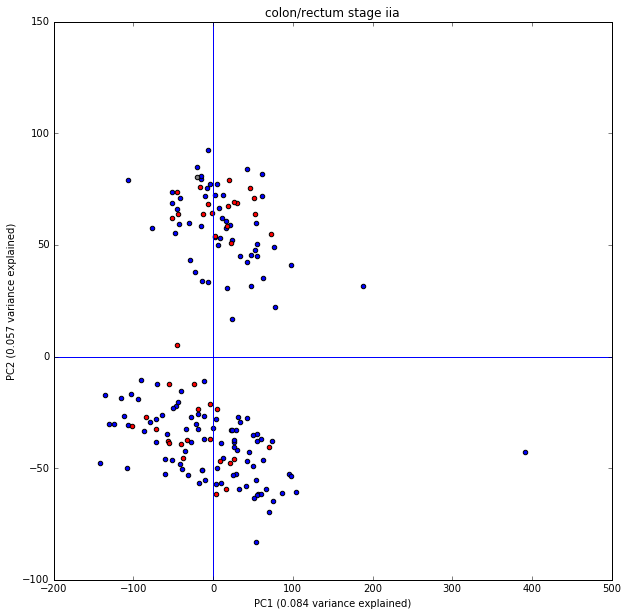

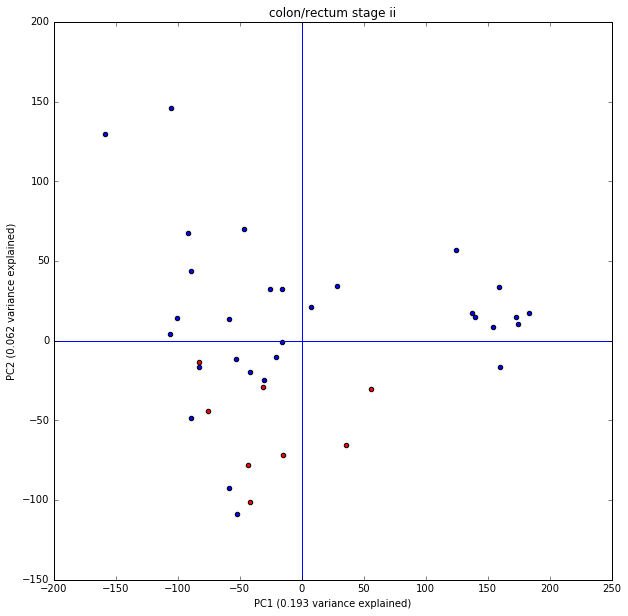

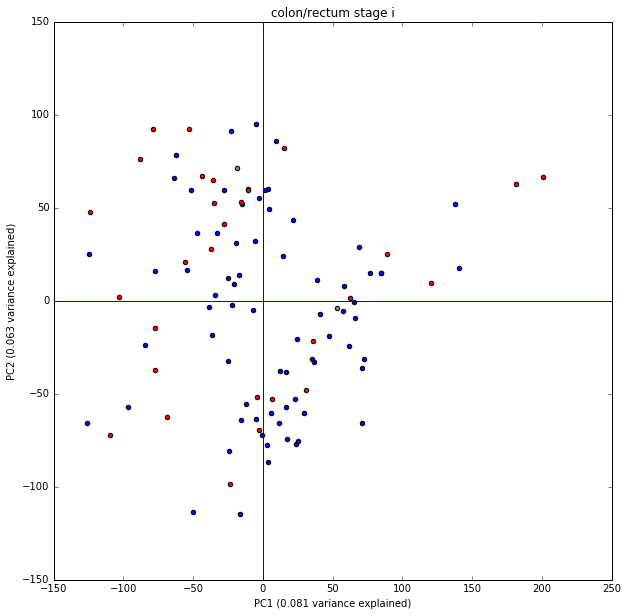

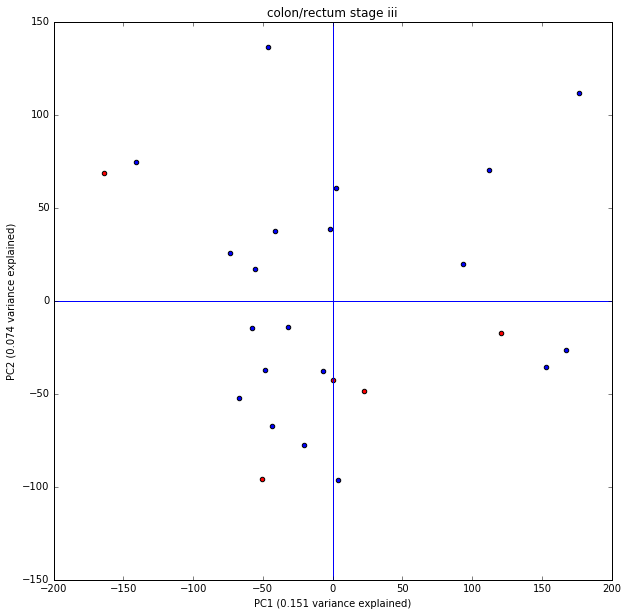

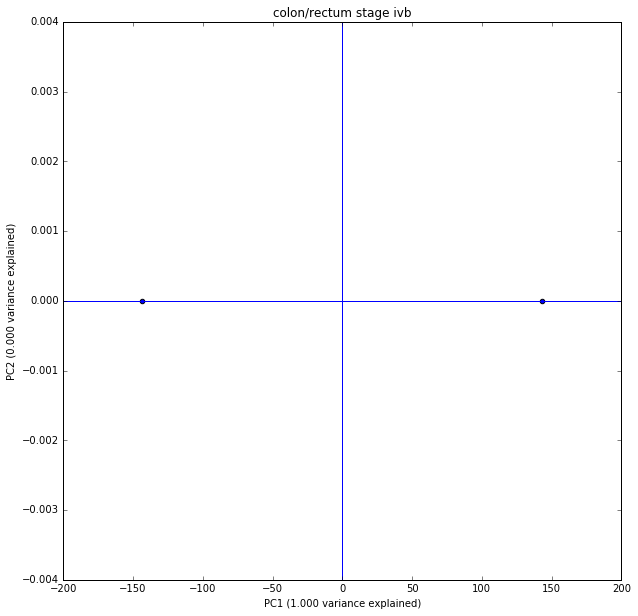

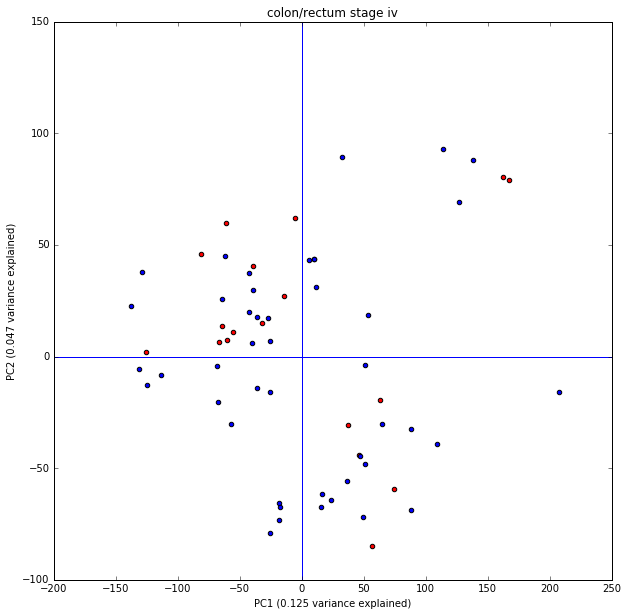

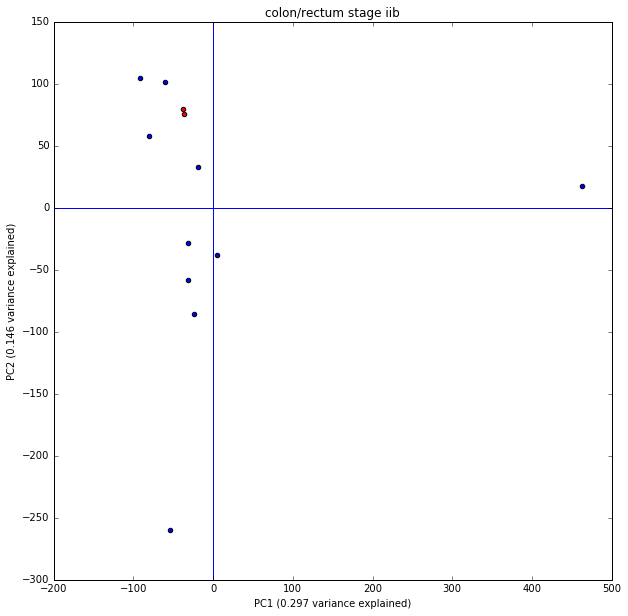

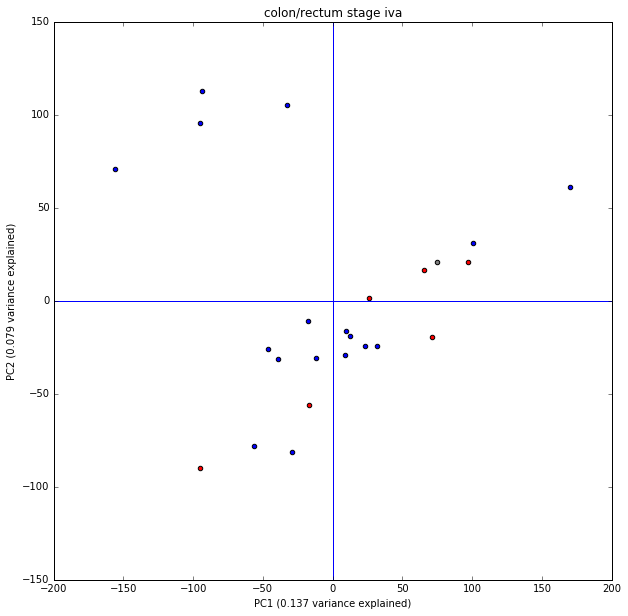

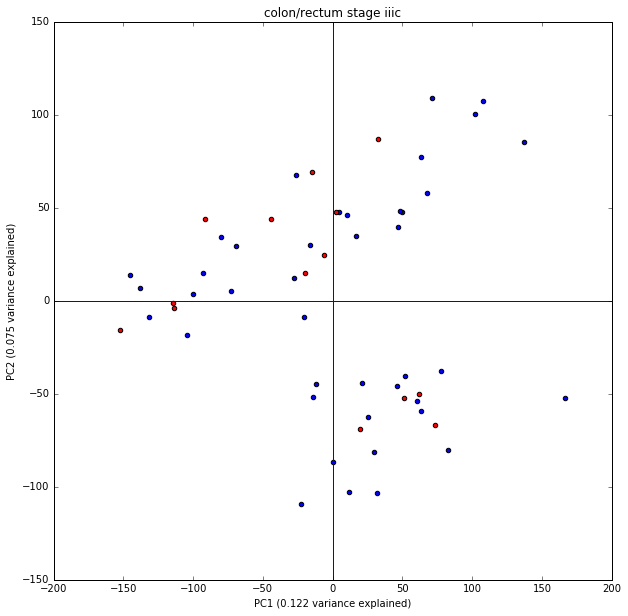

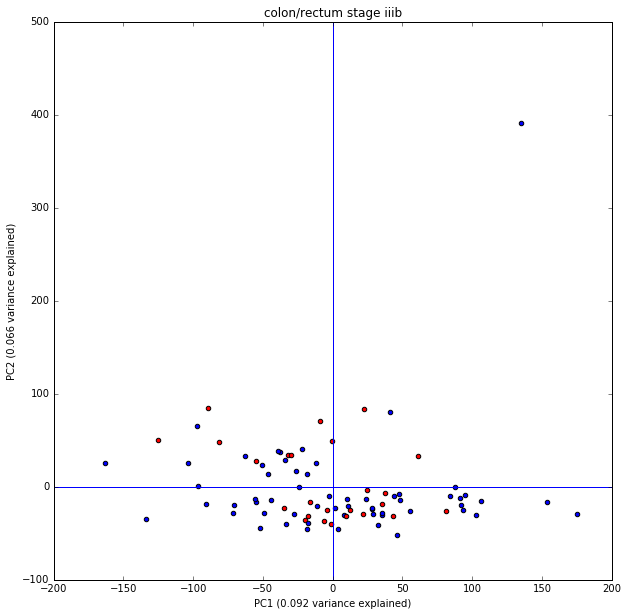

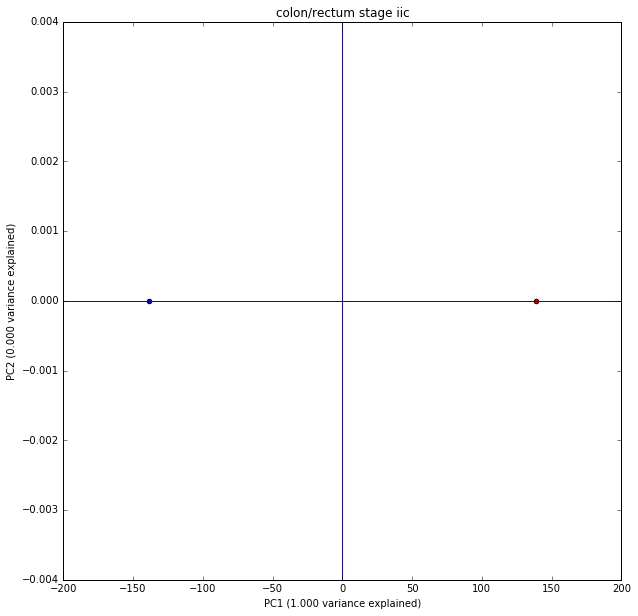

In [10]:
for stage in list(set(stage_info)):
    if str(stage) != 'nan' and stage_count[stage] > 0:
        stage_df = get_stage_df(stage, data_logged)
        patient_color_list = get_patient_color_list(stage_df, 'rectum')
        
        pca = PCA()
        stage_pca_data = pca.fit_transform(stage_df.transpose())
        
        plot_pca_components(stage_df, stage_pca_data, 0, 1, patient_color_list, 'colon/rectum ' + str(stage))